# Expriment on AI Impact on Jobs dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/ai_impact_on_jobs.csv')
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
print(df.describe())

Dataset Shape: (4706, 6)
Columns: ['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio', 'Domain']
              Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
0  Communications Manager       98%    365       2546           0.143362   
1          Data Collector       95%    299       2148           0.139199   
2              Data Entry       95%    325       2278           0.142669   
3              Mail Clerk       95%    193       1366           0.141288   
4      Compliance Officer       92%    194       1369           0.141709   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strategy  
4       Medical & Healthcare  
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000      

In [3]:
def data_cleaning(df):
    df['AI_Workload_Ratio'].replace([np.inf,-np.inf], np.nan, inplace = True)
    print(f'Null Values before being handled: \n{df.isnull().sum()}')
    mean_val = df['AI_Workload_Ratio'].mean()
    df['AI_Workload_Ratio'].fillna(mean_val, inplace = True)
    print(f'Null Values after being handled: \n{df.isnull().sum()}')
    print('*'*30)
    print(f'Number of duplicates: \n{df.duplicated().sum()}')
data_cleaning(df)

Null Values before being handled: 
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    7
Domain               0
dtype: int64
Null Values after being handled: 
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64
******************************
Number of duplicates: 
0


<ipython-input-3-33e00de29ea8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AI_Workload_Ratio'].replace([np.inf,-np.inf], np.nan, inplace = True)
<ipython-input-3-33e00de29ea8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [4]:
df['AI Impact'] = df['AI Impact'].astype(str).str.rstrip('%').astype(float) / 100

<Axes: xlabel='AI Impact', ylabel='Domain'>

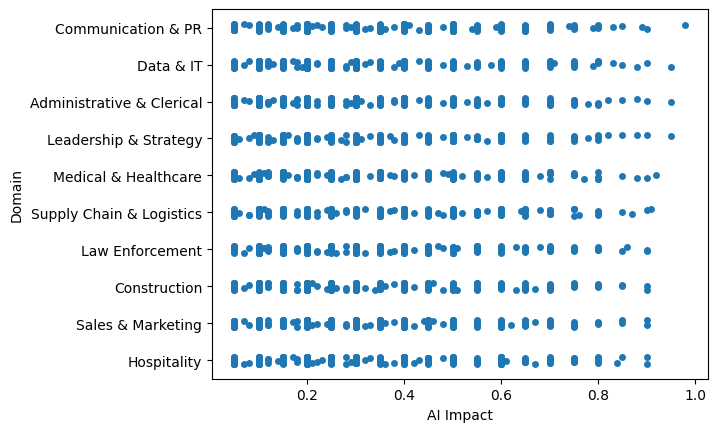

In [23]:
sns.stripplot(x="AI Impact", y="Domain", data=df)

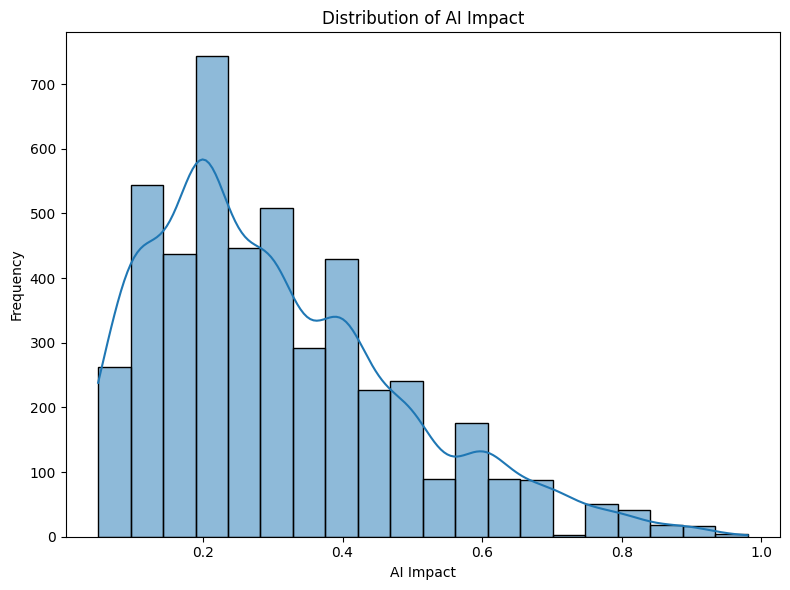

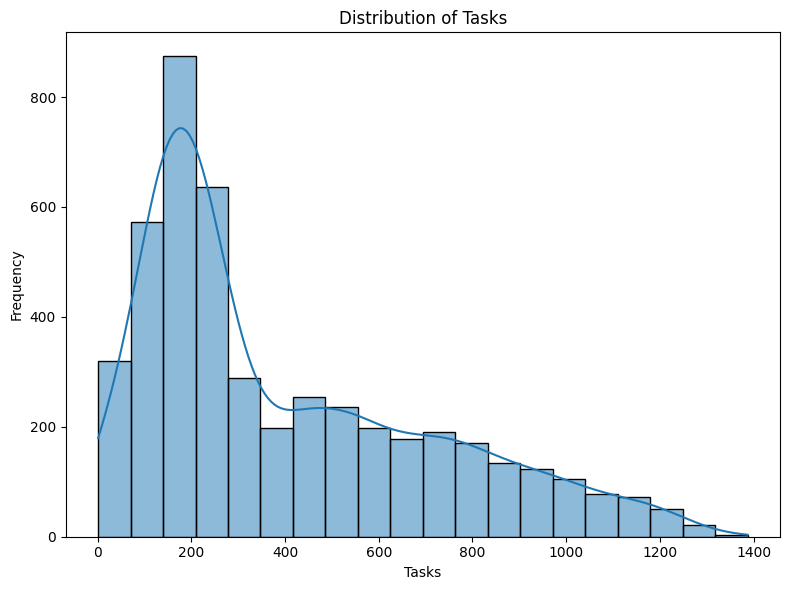

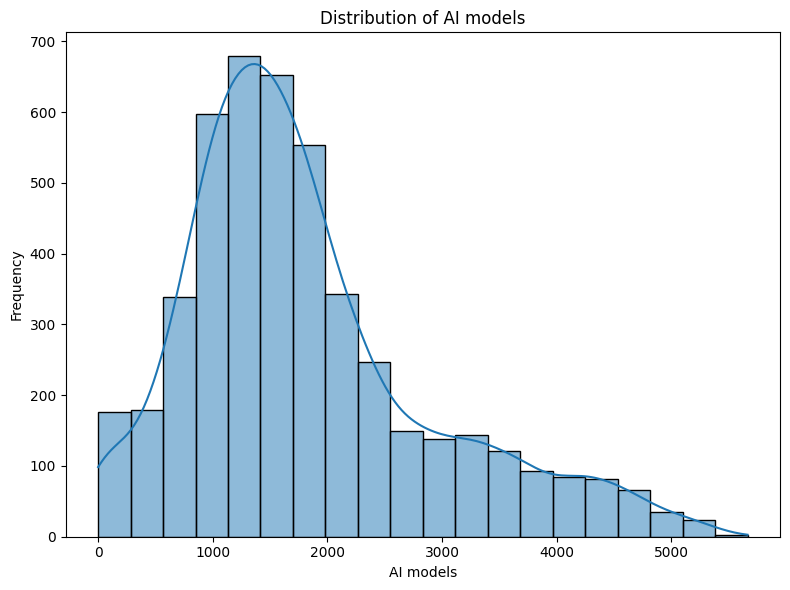

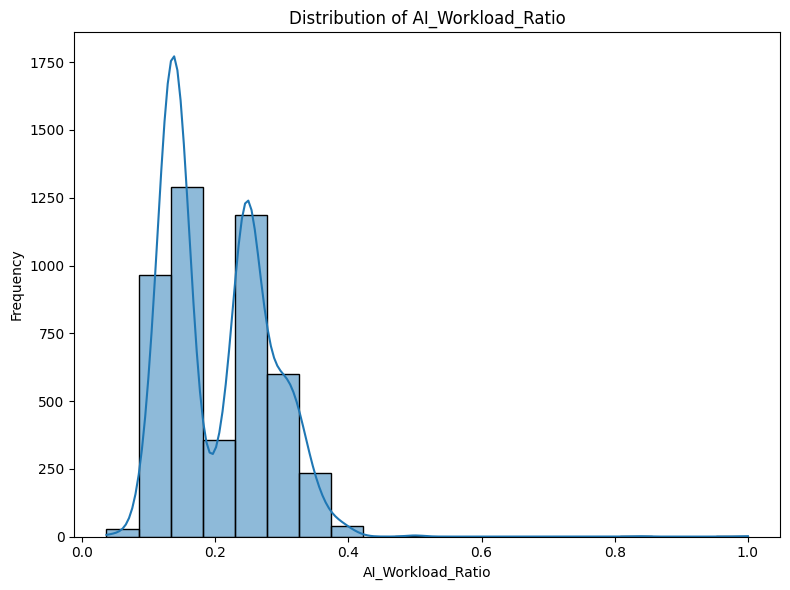

In [24]:
# Plot histograms with KDE for each numerical column
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

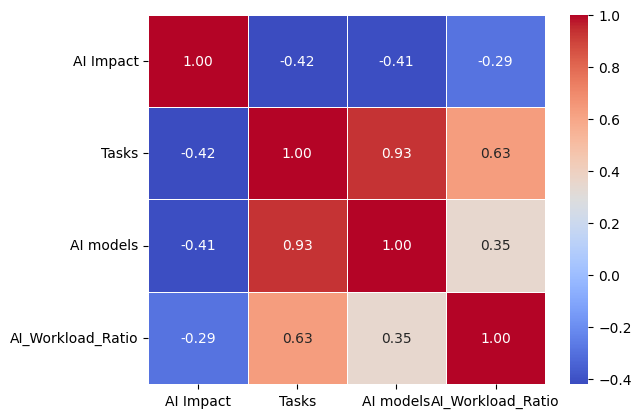

In [25]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

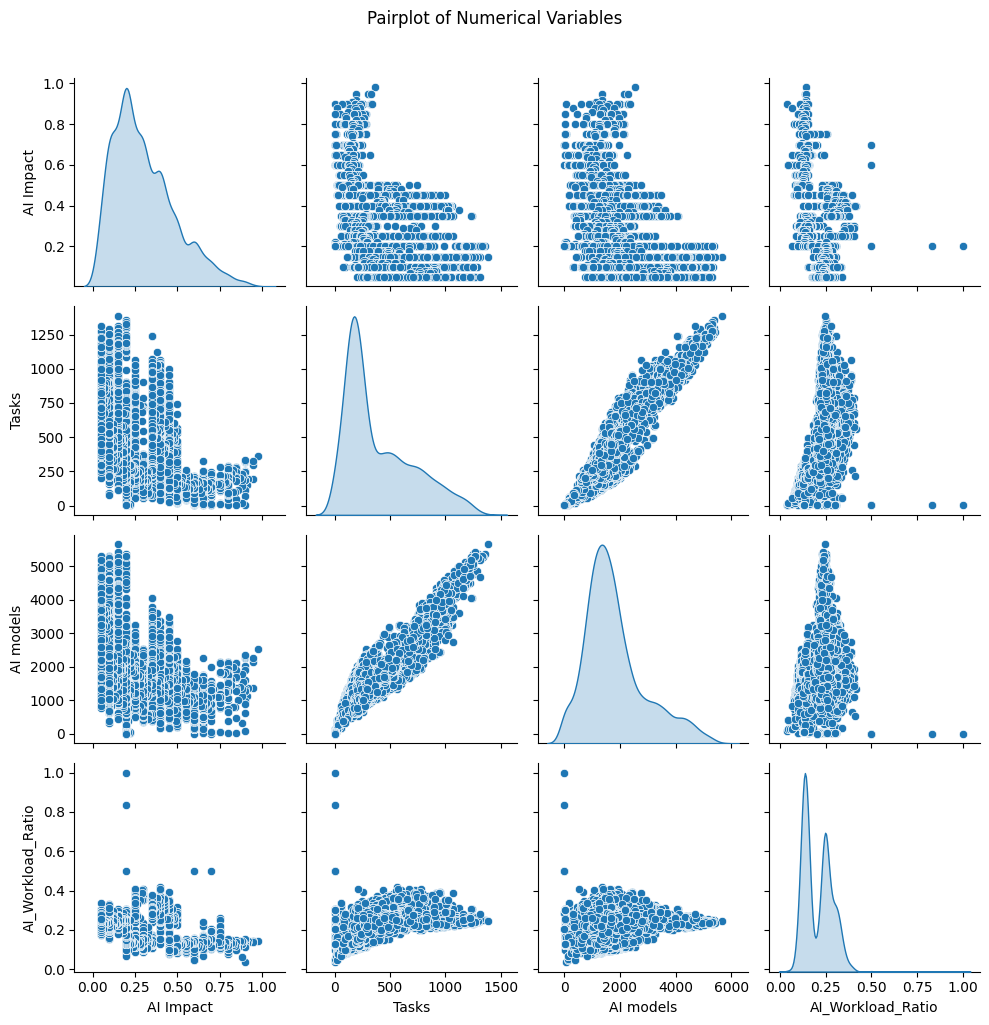

In [26]:
# Create a pairplot for numerical columns
sns.pairplot(df[numeric_cols], diag_kind='kde', height=2.5)
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()

# Regression Task: Predicting AI Impact


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df["Job_Title_Encoded"] = df.groupby("Job titiles")["AI Impact"].transform("mean")
df["Domain_Encoded"] = df.groupby("Domain")["AI Impact"].transform("mean")

# Selecting relevant features
processed_df = df[['Job_Title_Encoded', 'Domain_Encoded', 'Tasks', 'AI models', 'AI_Workload_Ratio', 'AI Impact']]

# Handling infinity values and scaling numerical features
processed_df.replace([np.inf, -np.inf], np.nan, inplace=True)
processed_df.fillna(processed_df.median(), inplace=True)

scaler = MinMaxScaler()
processed_df[['Tasks', 'AI models', 'AI_Workload_Ratio', 'Job_Title_Encoded', 'Domain_Encoded']] = scaler.fit_transform(
    processed_df[['Tasks', 'AI models', 'AI_Workload_Ratio', 'Job_Title_Encoded', 'Domain_Encoded']])

# Splitting data into features and target variable
X = processed_df.drop(columns=['AI Impact'])
y = processed_df['AI Impact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

<ipython-input-28-b6e7691148fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-28-b6e7691148fb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.fillna(processed_df.median(), inplace=True)
<ipython-input-28-b6e7691148fb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[['Ta


Model Performance:
Mean Absolute Error (MAE): 9.71337579621891e-05
Root Mean Squared Error (RMSE): 0.0007362973298619007
R² Score: 0.999985044492768


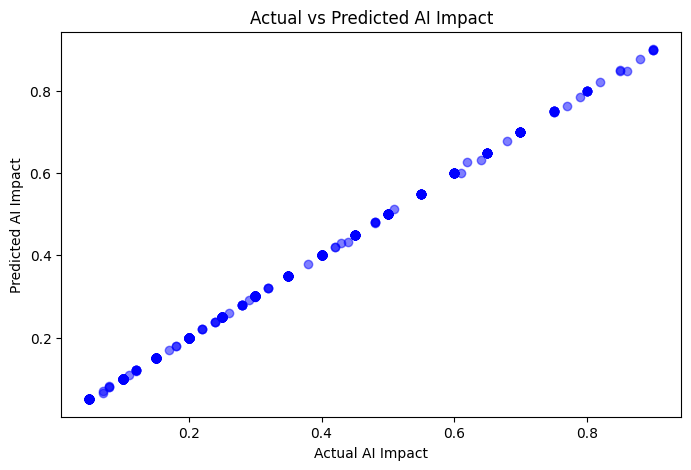

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual AI Impact")
plt.ylabel("Predicted AI Impact")
plt.title("Actual vs Predicted AI Impact")
plt.show()

# Clustering task for jobs
1. Scales the features using only 'Tasks', 'AI models', and 'AI_Workload_Ratio'
2. Applies KMeans clustering.
3. Calculates the silhouette score to evaluate the clustering.
4. Uses PCA to reduce the dimensionality to 2 components for visualization.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Clustering Task using only 'Tasks', 'AI models', and 'AI_Workload_Ratio'
features = ['Tasks', 'AI models', 'AI_Workload_Ratio']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering (example using 3 clusters)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe for further analysis
df['Cluster'] = cluster_labels

# Evaluate clustering performance using the silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5466296083980393


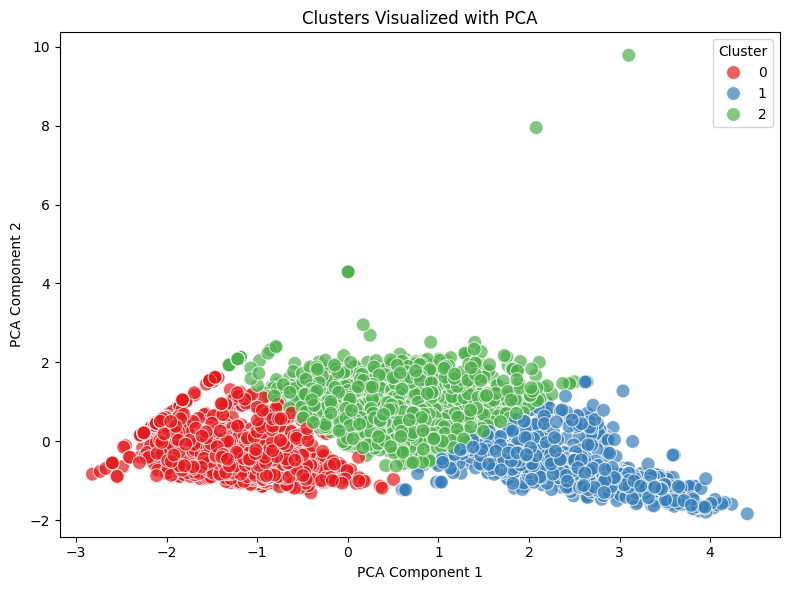

In [ ]:
# Use PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plot the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title("Clusters Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Cluster Mean Values:
               Tasks    AI models  AI_Workload_Ratio
Cluster                                            
0        167.378401  1216.089035           0.140150
1        915.197778  3651.523333           0.252396
2        475.357971  1679.268116           0.286796


<ipython-input-16-e86fea06fff0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
<ipython-input-16-e86fea06fff0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
<ipython-input-16-e86fea06fff0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')


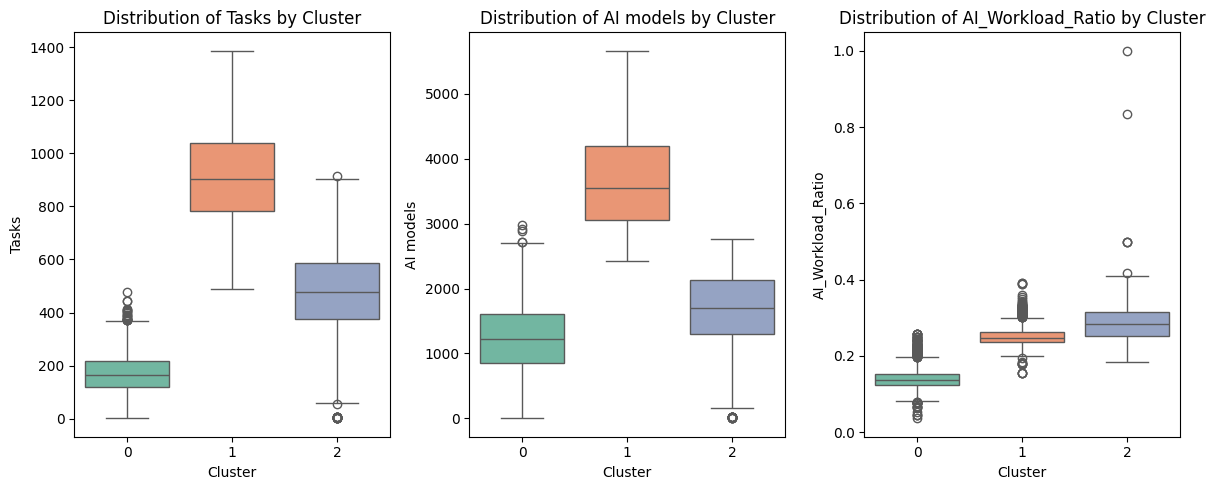

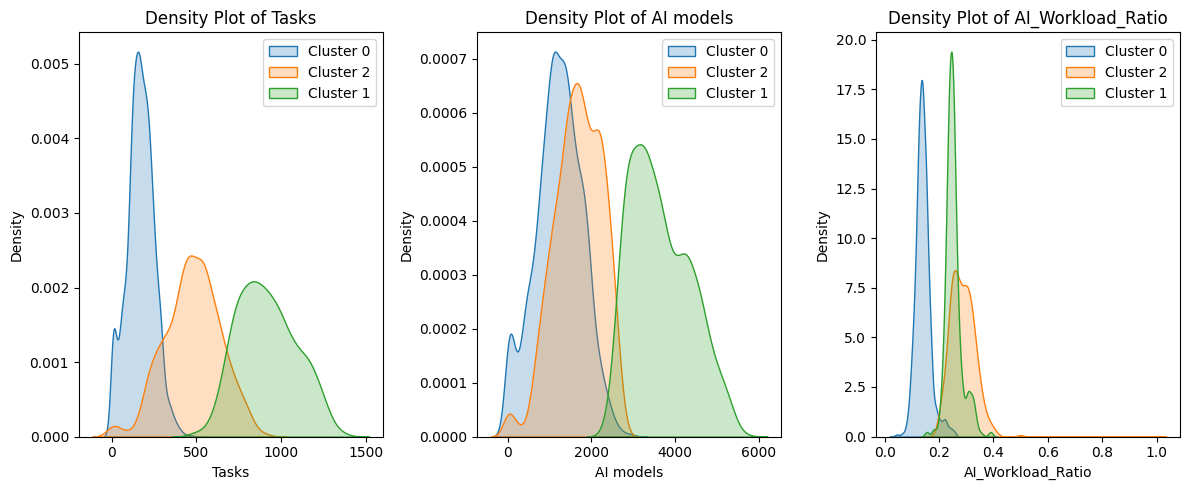

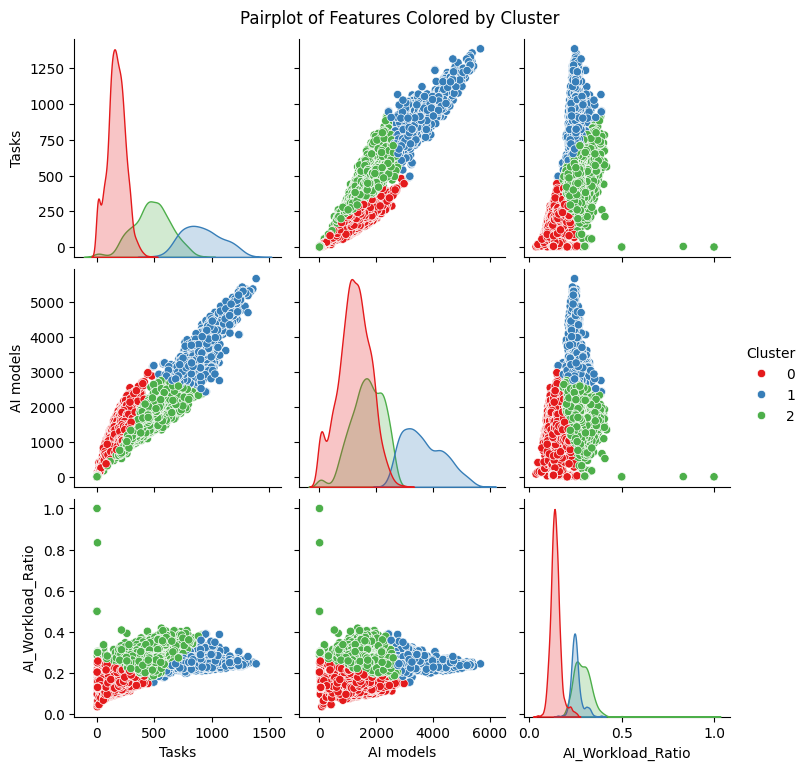

In [ ]:
# Compute the mean values of each cluster for interpretation
cluster_summary = df.groupby('Cluster')[['Tasks', 'AI models', 'AI_Workload_Ratio']].mean()
print("Cluster Mean Values:\n", cluster_summary)

# 1. Boxplots to visualize the spread of each feature within clusters
plt.figure(figsize=(12, 5))
for i, feature in enumerate(['Tasks', 'AI models', 'AI_Workload_Ratio']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
    plt.title(f"Distribution of {feature} by Cluster")

plt.tight_layout()
plt.show()

# 2. Histograms to visualize the distribution of features within clusters
plt.figure(figsize=(12, 5))
for i, feature in enumerate(['Tasks', 'AI models', 'AI_Workload_Ratio']):
    plt.subplot(1, 3, i + 1)
    for cluster in df['Cluster'].unique():
        sns.kdeplot(df[df['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f"Density Plot of {feature}")
    plt.legend()

plt.tight_layout()
plt.show()

# 3. Pairplot to visualize feature relationships within clusters
sns.pairplot(df, hue="Cluster", vars=['Tasks', 'AI models', 'AI_Workload_Ratio'], palette='Set1')
plt.suptitle("Pairplot of Features Colored by Cluster", y=1.02)
plt.show()


# Expriment on AI Job Market Insights Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


csv_path = "/content/ai_job_market_insights.csv"
df = pd.read_csv(csv_path)
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [ ]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [ ]:
print(f"Datapoints: {df.shape[0]}, Features: {df.shape[1]}")
print("\n Statistics of the Data")
df.describe()

Datapoints: 500, Features: 10

 Statistics of the Data


,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [ ]:
df.isna().sum()

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


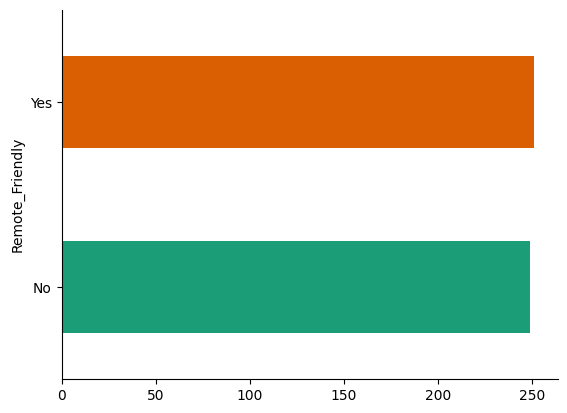

In [ ]:
df.groupby('Remote_Friendly').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Company_Size vs AI_Adoption_Level

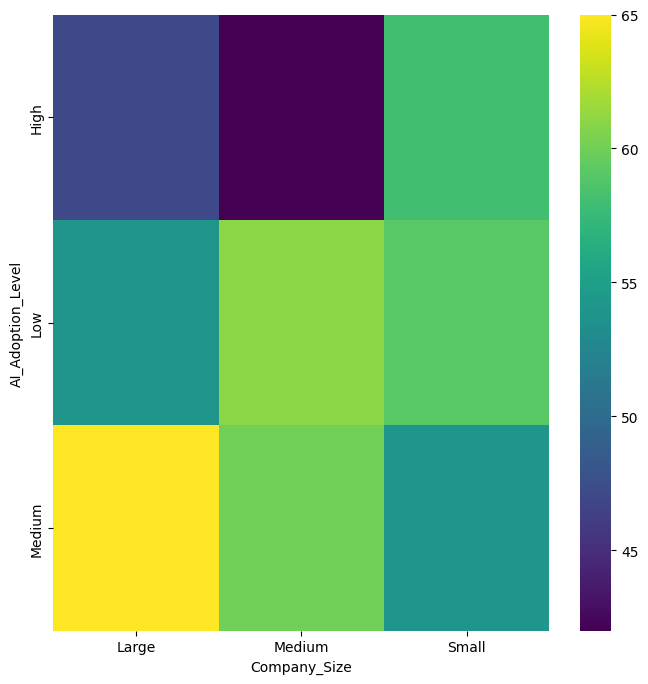

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AI_Adoption_Level'].value_counts()
    for x_label, grp in df.groupby('Company_Size')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company_Size')
_ = plt.ylabel('AI_Adoption_Level')

## Highest number of different Job Titles
- their description
- company features that are powered by AI

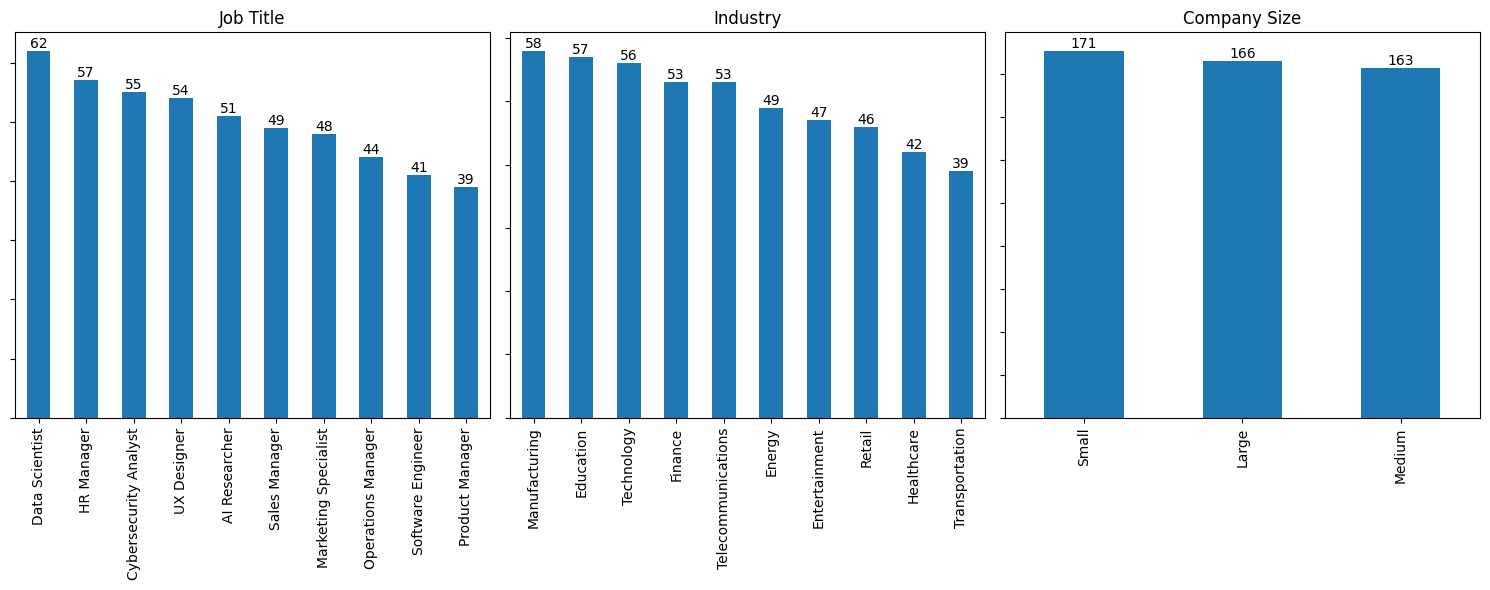

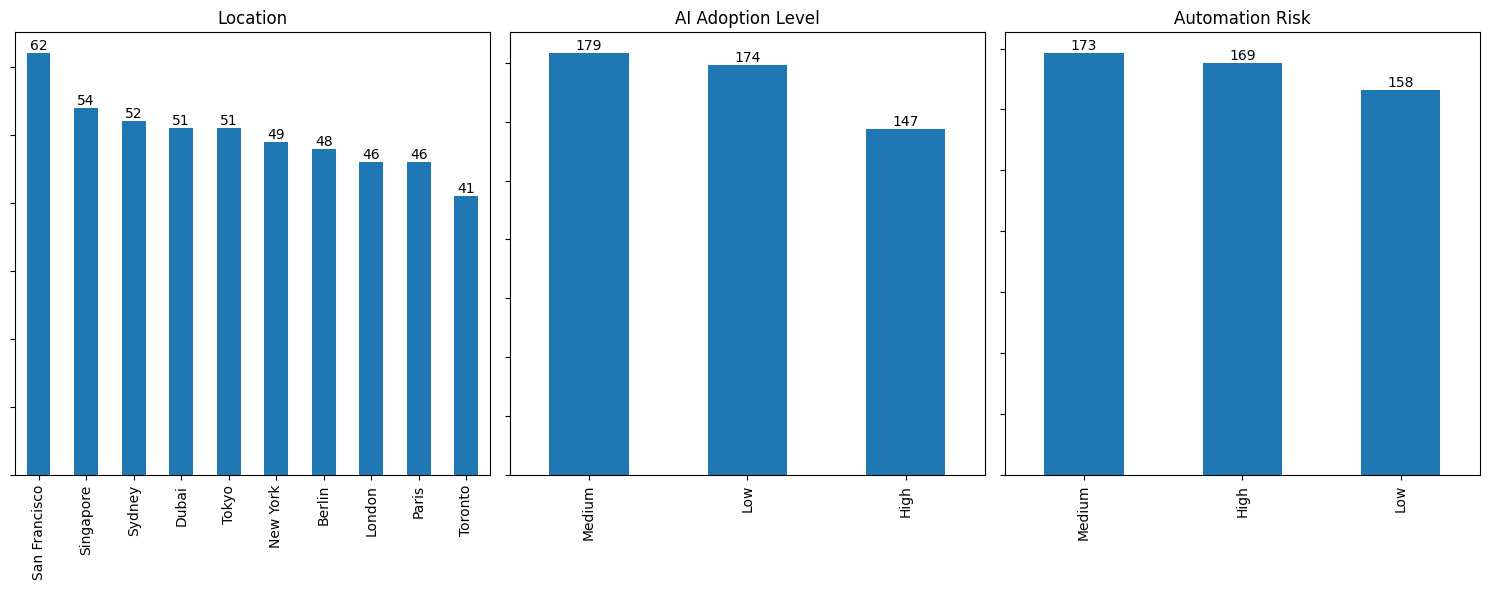

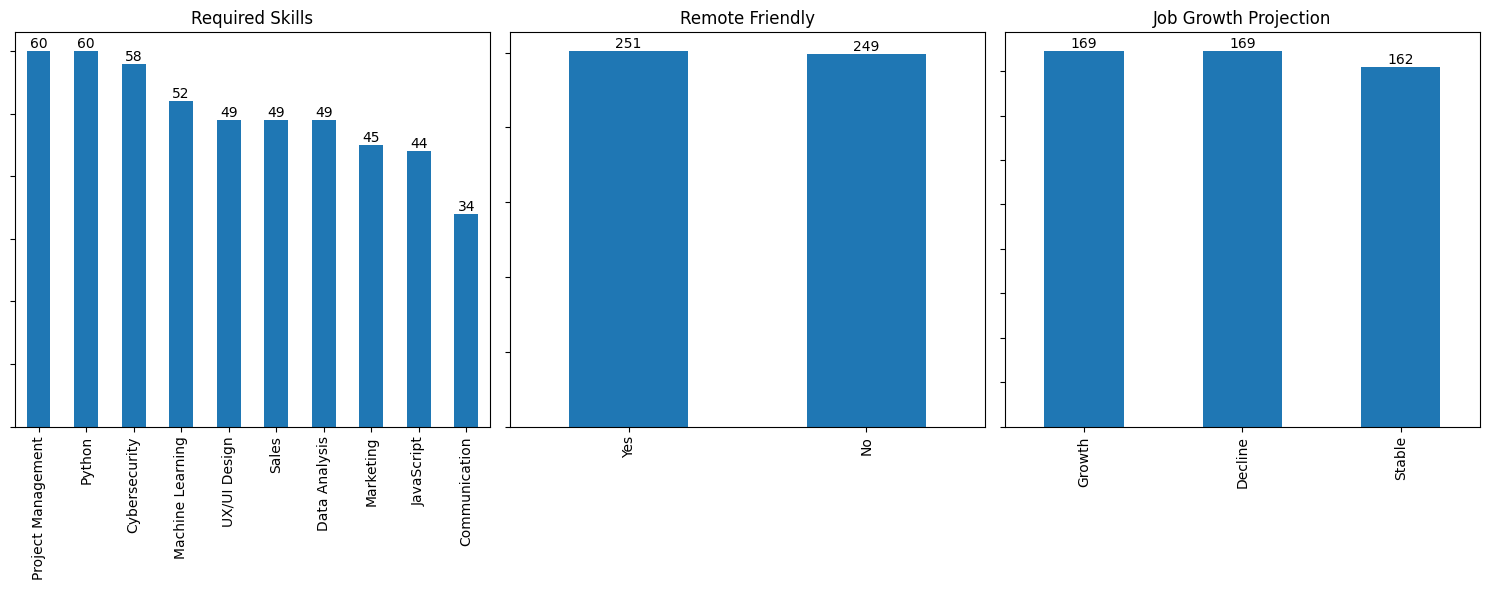

In [ ]:
salary = "Salary_USD"
cats = [i for i in df.columns if i != salary]

index = 0
for _ in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        count = df[cats[index]].value_counts()
        count.plot(kind="bar", ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container)
        axes[i].set_yticklabels(())
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

## Salary distribution among AI powered jobs

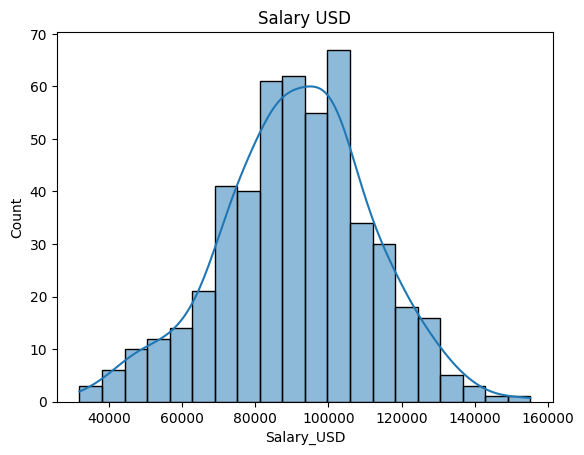

In [ ]:
fig, axes = plt.subplots()
sns.histplot(df, x=salary, kde=True, ax=axes)
axes.set_title(salary.replace('_', ' '))
plt.show()

## Average Salaries Among Different Company Types & Job Titles

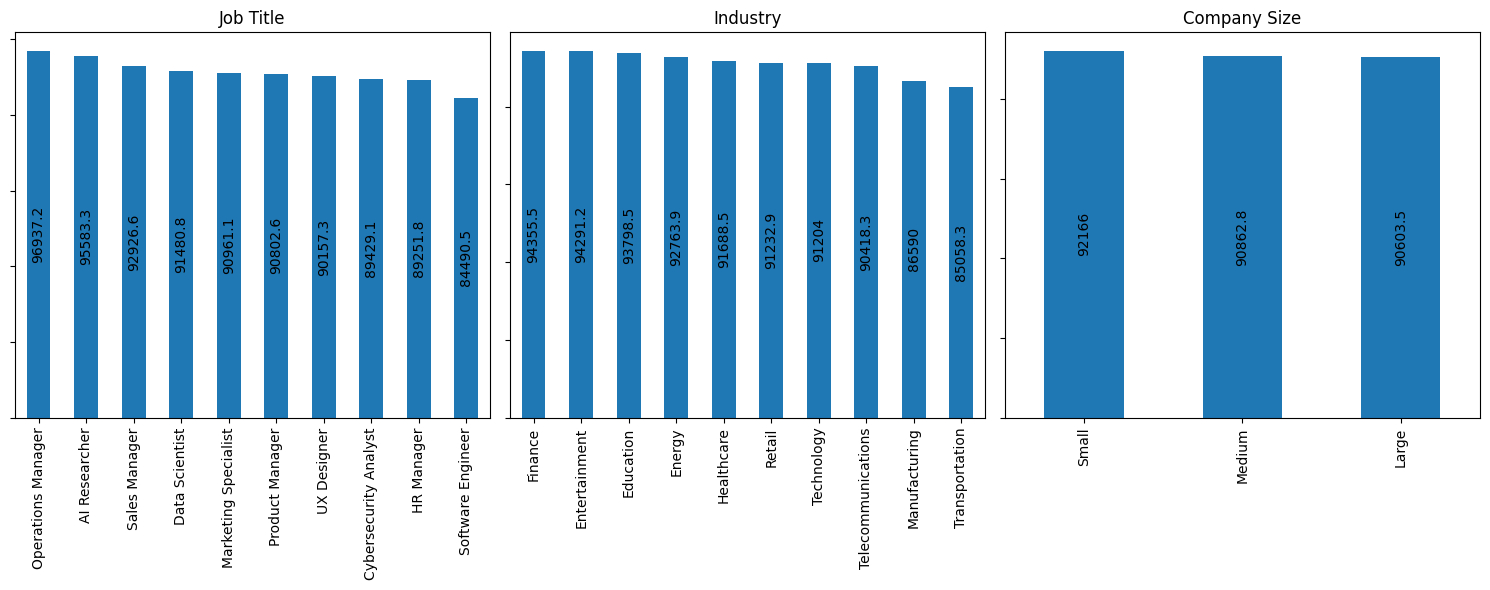

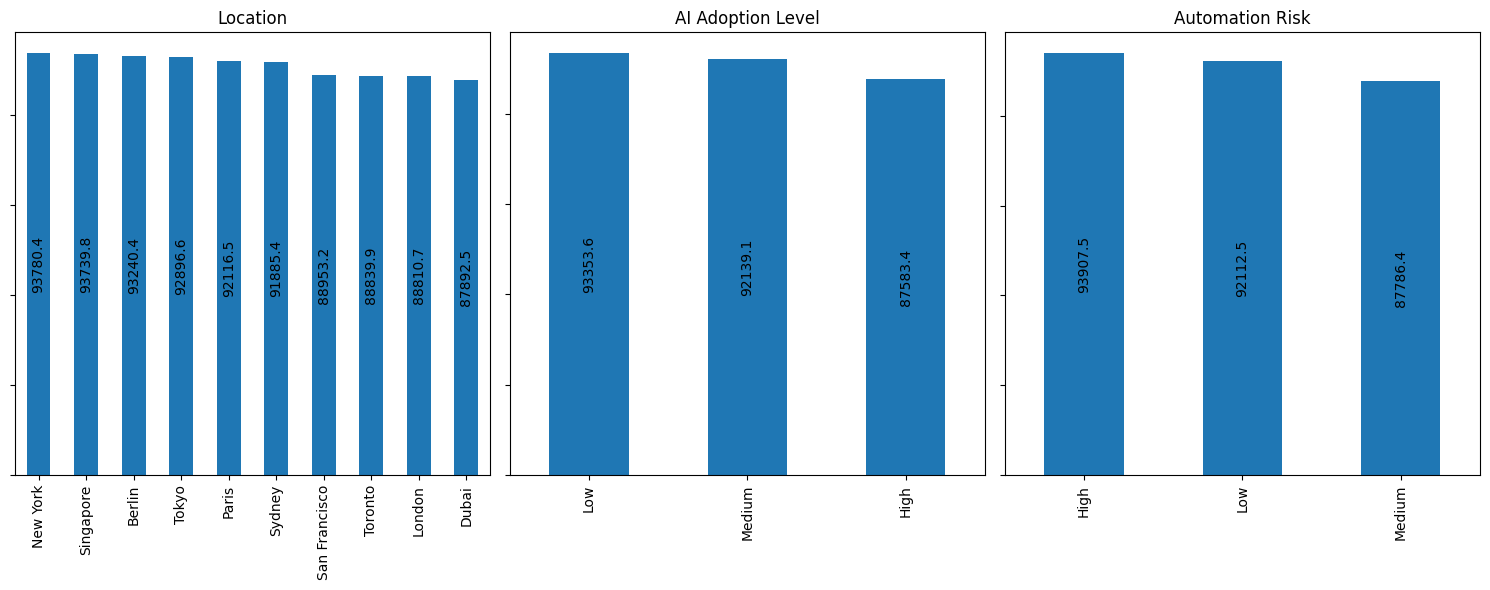

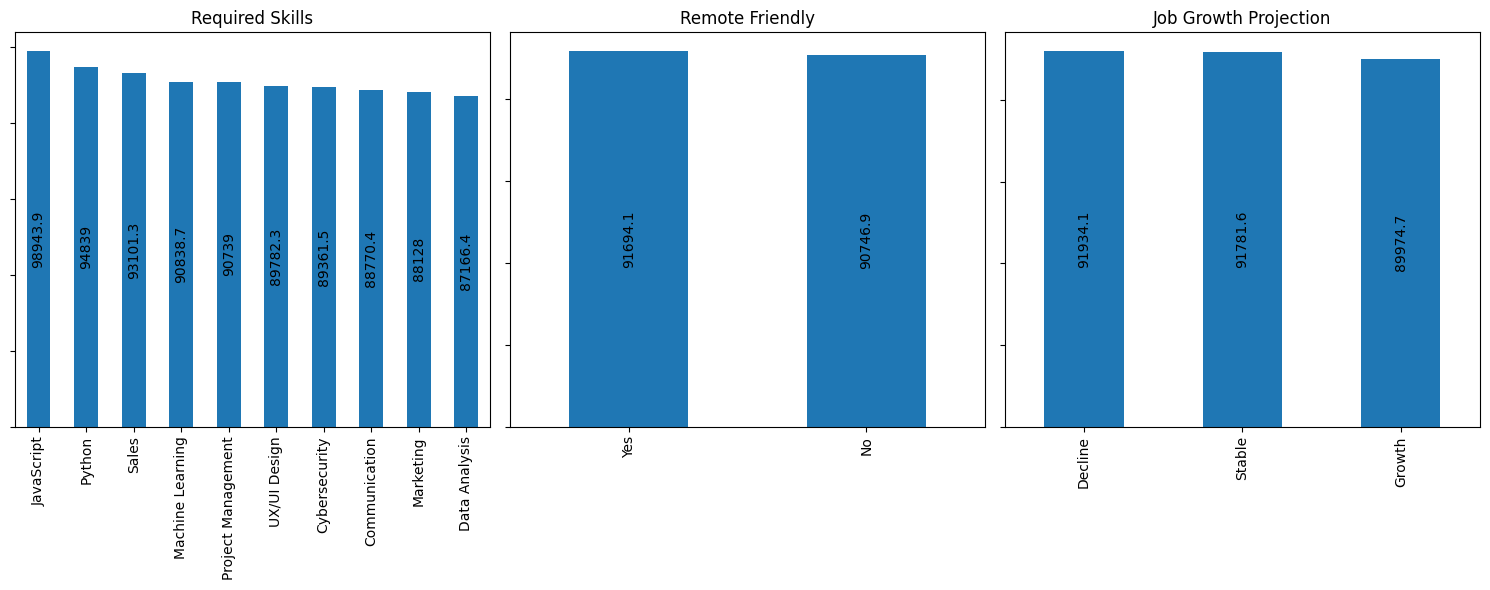

In [ ]:
index = 0
for _ in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        grouped = df.groupby(cats[index])
        mean = grouped[salary].mean()
        mean = mean.sort_values(ascending=False)
        mean.plot(kind="bar", ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container, rotation=90, label_type="center")
        axes[i].set_yticklabels(())
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

## Distribution of job roles across different industries

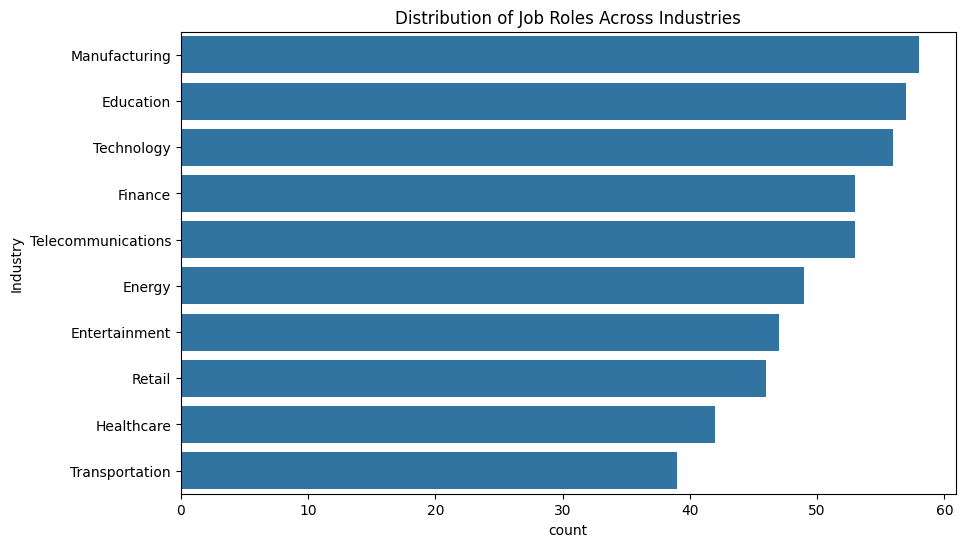

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index)
plt.title('Distribution of Job Roles Across Industries')
plt.show()

## Remote Work and Salary

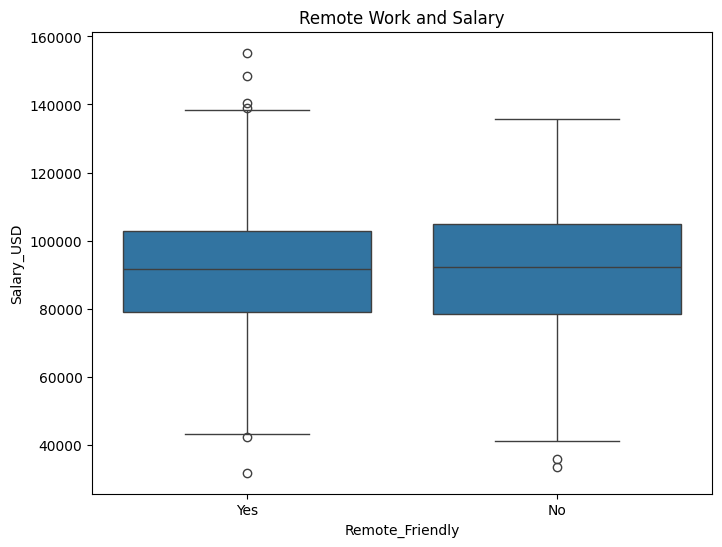

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Remote_Friendly', y='Salary_USD', data=df)
plt.title('Remote Work and Salary')
plt.show()

## Salary Distribution by Industry

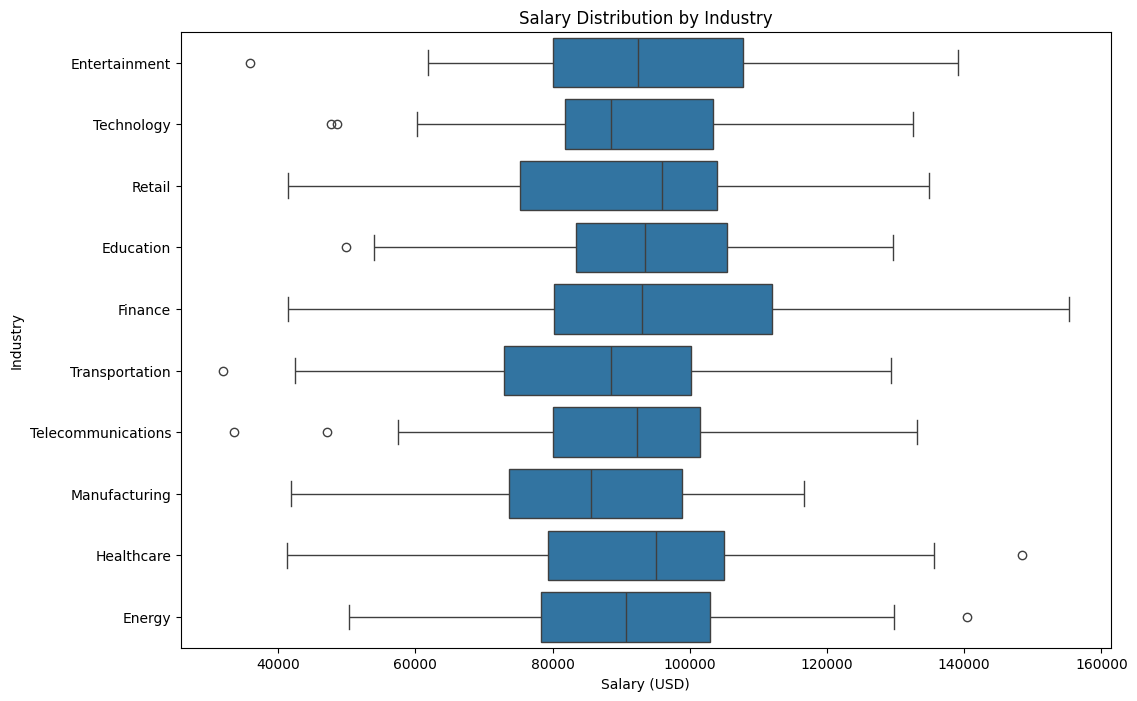

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary_USD', y='Industry', data=df)
plt.title('Salary Distribution by Industry')
plt.xlabel('Salary (USD)')
plt.ylabel('Industry')
plt.show()

## Most In-Demand Skills

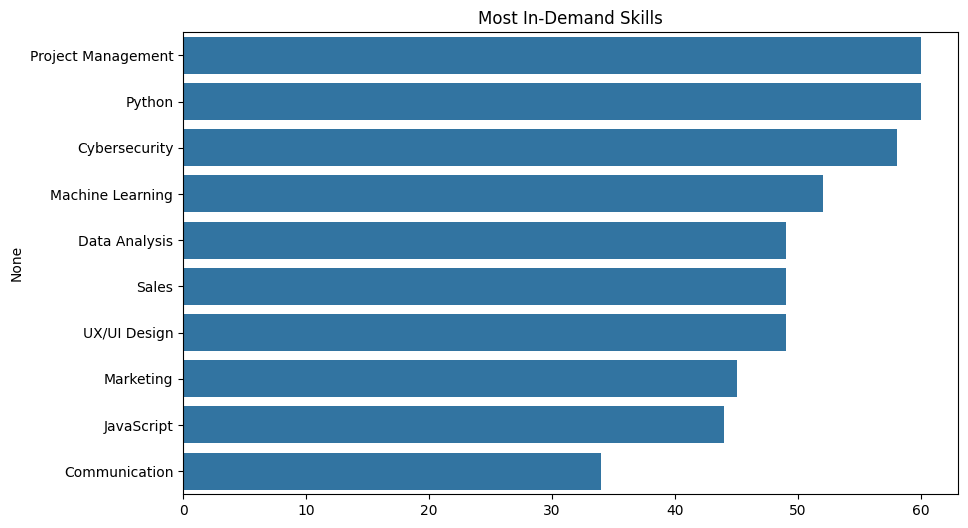

In [ ]:
skills = df['Required_Skills'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=skills.values, y=skills.index)
plt.title('Most In-Demand Skills')
plt.show()

# AI Influence on Skill Demand

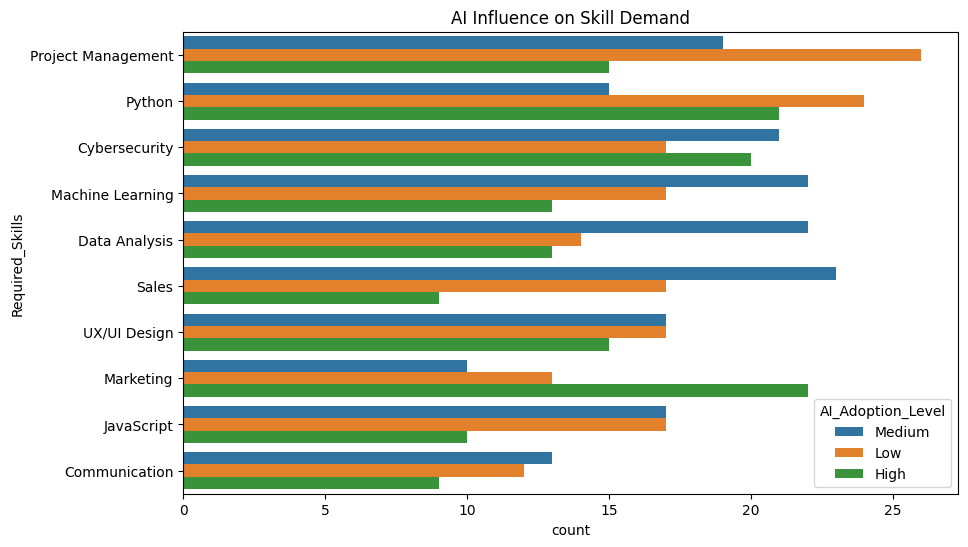

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Required_Skills', hue='AI_Adoption_Level', data=df, order=skills.index)
plt.title('AI Influence on Skill Demand')
plt.show()

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
label_encoder = LabelEncoder()

for i in cats:
    df[i] = label_encoder.fit_transform(df[i].values)

In [ ]:
x = df.drop(salary, axis=1).values
y = df[salary].values
y = y.reshape(-1, 1)

data = np.hstack((x, y))
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

x = data[:, :-1]
y = data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 9) (100, 9) (400,) (100,)


In [ ]:
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
abc = AdaBoostRegressor()
etc = ExtraTreesRegressor()
svr = SVR()
lnr = LinearRegression()
xgb = XGBRegressor()
lgb = LGBMRegressor(verbose=-100)

models = [rfc, gbc, abc, etc, svr, lnr, xgb, lgb]
names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Extra Trees",
        "Support Vector Machine", "Linear Regression", "XGBoost", "LightGBM"]

In [ ]:
def training():
    mses, r2s = [], []

    for i, j in zip(models, names):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        mses += [mean_squared_error(pred, y_test)]
        r2s += [r2_score(pred, y_test)]

    dd = pd.DataFrame({"mse": mses, "r2": r2s}, index=names)

    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

    index = 0

    dd = dd.sort_values("r2", ascending=False)
    dd["r2"].plot(kind="bar", ax=axes[index])
    for container in axes[index].containers:
        axes[index].bar_label(container)
    axes[index].set_yticklabels(())
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")
    axes[index].set_title("R2 score")

    index += 1

    dd = dd.sort_values("mse", ascending=True)
    dd["mse"].plot(kind="bar", ax=axes[index])

    for container in axes[index].containers:
        axes[index].bar_label(container)
    axes[index].set_yticklabels(())
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")
    axes[index].set_title("MSE score")

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


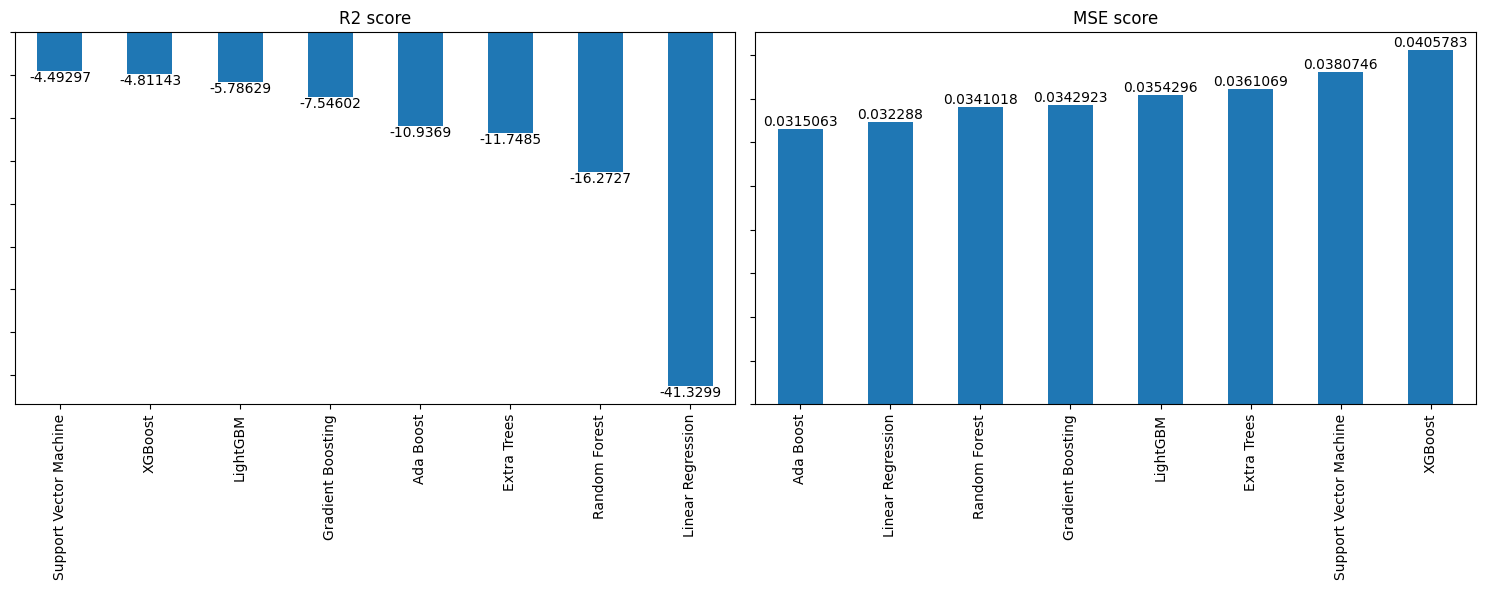

In [ ]:
training()

In [ ]:
# Automation Risk Prediction
X = pd.get_dummies(df.drop(['Automation_Risk'], axis=1), drop_first=True)
y = df['Automation_Risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# get accuracy
print("Automation Risk Prediction Accuracy:", accuracy_score(y_test, y_pred))
# get classification report
print("\n", classification_report(y_test, y_pred))

Automation Risk Prediction Accuracy: 0.42857142857142855

               precision    recall  f1-score   support

           0       0.43      0.47      0.45        57
           1       0.45      0.29      0.35        59
           2       0.42      0.53      0.47        59

    accuracy                           0.43       175
   macro avg       0.43      0.43      0.42       175
weighted avg       0.43      0.43      0.42       175



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

# Load data
df = pd.read_csv('/content/ai_job_market_insights.csv')


X = df.drop('Automation_Risk', axis=1)
y = df['Automation_Risk']

categorical_cols = ['Job_Title', 'Industry', 'Company_Size', 'Location',
                    'AI_Adoption_Level', 'Required_Skills',
                    'Remote_Friendly', 'Job_Growth_Projection']


numeric_cols = ['Salary_USD']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Define a helper function to train and evaluate models
def evaluate_model(name, model):
    """
    Fits the given model, makes predictions, and prints out
    performance metrics (accuracy, F1) for quick comparison.
    """
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='weighted')

    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("F1 Score (weighted):", f1)
    print("Classification Report:\n", classification_report(y_test, preds, target_names=label_encoder.classes_))
    print("-"*40)
    return acc, f1

# Build pipelines for each model so that preprocessing + model are combined
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=500))
])

rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier())
])

svc_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', SVC())
])

xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Train and evaluate each pipeline
results = {}
for name, pipeline in [
    ('Logistic Regression', lr_pipeline),
    ('Random Forest', rf_pipeline),
    ('Support Vector Classifier', svc_pipeline),
    ('XGBoost', xgb_pipeline)
]:
    acc, f1 = evaluate_model(name, pipeline)
    results[name] = (acc, f1)


print("=== Model Comparison ===")
for model_name, (acc, f1) in results.items():
    print(f"{model_name}: Accuracy={acc:.3f}, F1={f1:.3f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Accuracy: 0.41
F1 Score (weighted): 0.4132508884150676
Classification Report:
               precision    recall  f1-score   support

        High       0.36      0.38      0.37        34
         Low       0.36      0.42      0.39        31
      Medium       0.54      0.43      0.48        35

    accuracy                           0.41       100
   macro avg       0.42      0.41      0.41       100
weighted avg       0.42      0.41      0.41       100

----------------------------------------
=== Random Forest ===
Accuracy: 0.4
F1 Score (weighted): 0.3992622615246049
Classification Report:
               precision    recall  f1-score   support

        High       0.37      0.41      0.39        34
         Low       0.32      0.29      0.31        31
      Medium       0.50      0.49      0.49        35

    accuracy                           0.40       100
   macro avg       0.40      0.40      0.40       100
weighted avg       0.40      0.40      0.40  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

=== XGBoost ===
Accuracy: 0.35
F1 Score (weighted): 0.3488235294117647
Classification Report:
               precision    recall  f1-score   support

        High       0.27      0.24      0.25        34
         Low       0.32      0.39      0.35        31
      Medium       0.45      0.43      0.44        35

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.35       100
weighted avg       0.35      0.35      0.35       100

----------------------------------------
=== Model Comparison ===
Logistic Regression: Accuracy=0.410, F1=0.413
Random Forest: Accuracy=0.400, F1=0.399
Support Vector Classifier: Accuracy=0.440, F1=0.358
XGBoost: Accuracy=0.350, F1=0.349


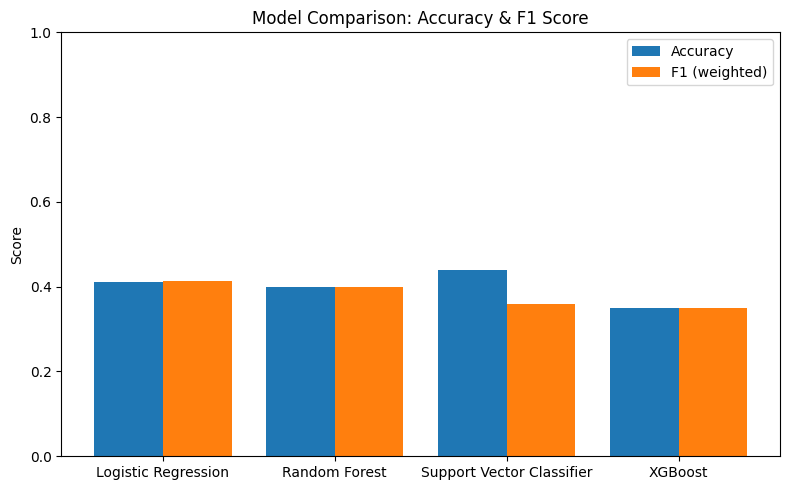

In [12]:
model_names = list(results.keys())
accuracies = [res[0] for res in results.values()]
f1_scores = [res[1] for res in results.values()]

x_pos = np.arange(len(model_names))
width = 0.4

plt.figure(figsize=(8, 5))
plt.bar(x_pos - width/2, accuracies, width=width, label='Accuracy')
plt.bar(x_pos + width/2, f1_scores, width=width, label='F1 (weighted)')

plt.xticks(x_pos, model_names, ha='center')

plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy & F1 Score')
plt.legend()
plt.tight_layout()
plt.show()